<a href="https://colab.research.google.com/github/lloppy/neironki_5sem/blob/main/%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA_%D0%90%D0%BD%D0%BA%D1%83%D0%B4%D0%B8%D0%BD%D0%BE%D0%B2%D0%B0_%D0%9F%D0%BE%D0%BB%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи:

1. Провести аналитику перед построением модели для решения задачи Титаник. Аналитика включает в себя 5-10 графиков, из которых можно сделать определенные выводы для дальнейшей работы. Просьба здесь максимально комментировать свой код.
2. Feature Engineering. На основе выводов из пункта 1 можно придумать несколько признаков в модель. Показать влияние каждого признака на результат.
3. Модель. На прошлой паре я писал модель полносвязной нейронной сети. Ваша задача заключается в том, чтобы совершенствовать архитектуру и улучшать метрику. Обязательно применять модели DL, поскольку у нас с Вами предмет - программирование нейронных сетей.
4. Результаты показывать на паре, где я даю обратную связь. И отправлять в соответствующие формы своевременно. Пока формы не было, но она будет на следующей неделе.
5. Наличие кросс-валидации. Минимум 3 фолда. Для каждого фолда - classification_report и confusion_matrix. Эта процедура нужна только для самой лучшей модели. Старые просто оставить, чтобы был виден объем проделанной работы, как пришли к лучшей модели
6. На основе полученных результатов сделать выводы в конце, для одной, итоговой модели(старые не удаляем).
7. Вывод должен содержать расшифровку матрицы ошибок. Формат: модель предсказала, что погибнет, а по факту не погиб = количество таких человек. Таким образом, для всех четырех вариантов(tf,tn,fn,fp). После этого, окончательный вывод о проделанной работе.

# 1. Аналитика. Знакомство с датасетом

In [189]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/Titanic.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


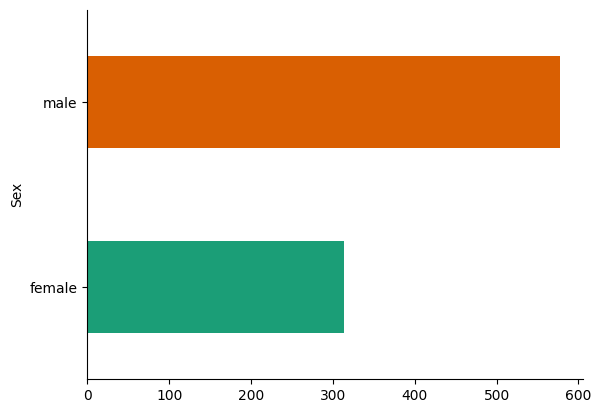

In [190]:
# график: соотношения мужчин / женщин
# вывод: мужчин было больше женщин

df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

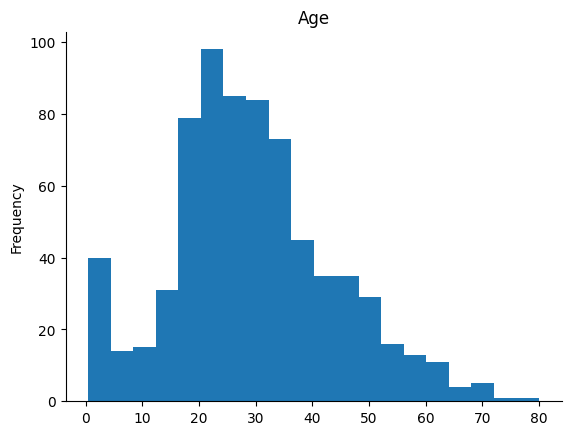

In [191]:
# график: распределение по возрастам
# вывод: больше всего было людей от 20 до 37 лет, также есть выброс от 0 до 3х лет

df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [192]:
# Есть пропуски в Age (177), Cabin(687) и Embarked(2)

df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


# 2. Аналитика. Построение графиков


Провести аналитику перед построением модели для решения задачи Титаник. Аналитика включает в себя 5-10 графиков, из которых можно сделать определенные выводы для дальнейшей работы. Просьба здесь максимально комментировать свой код.

## Рассмотрим следующие зависимости:

1. Распределение возраста по выжившим и погибшим
2. Подсчет количества выживших и погибших
3. Кто (мужчины/женщины) выживал чаще в зависимости от пола
4. Кто (мужчины/женщины) выживал чаще в зависимости от возраста
5. Кол-во выживших/не выживших пассажиров в зависимости от стоимости билета
6. Кол-во выживших пассажиров по порту отправления
7. Влияние Колонки Cabin с идентификатороми кабин


## 1. Распределение возраста по выжившим и погибшим


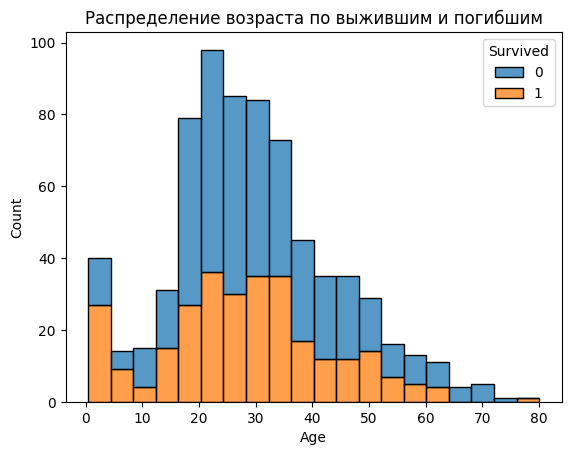

In [193]:
# 1. Распределение возраста по выжившим и погибшим

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Распределение возраста по выжившим и погибшим')
plt.show()

## 2. Подсчет количества выживших и погибших


In [194]:
# 2. Подсчет количества выживших и погибших
# Вывод: 62 процента погибло, 38 процентов выжили

survival_counts = df['Survived'].value_counts(normalize=True) * 100
print(survival_counts)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


## 3. Кто (мужчины/женщины) выживал чаще в зависимости от пола


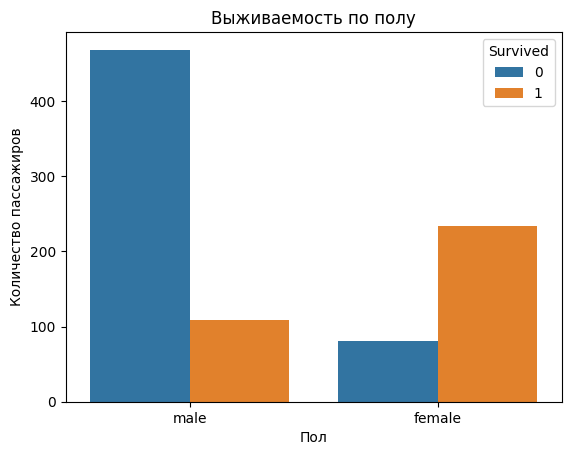

In [195]:
# 3. Кто (мужчины/женщины) выживал чаще в зависимости от пола
# Вывод: женщины выживали чаще, чем мужчины: 81 процент мужчин погибло, 74 процента женщин выжили

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выживаемость по полу')
plt.ylabel('Количество пассажиров')
plt.xlabel('Пол')
plt.show()

In [196]:
gender_survival = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
print(gender_survival)

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


Вывод: Женщины выживали чаще, чем мужчины:
81 процент мужчин погибло, 74 процента женщин выжили

## 4. Кто (мужчины/женщины) выживал чаще в зависимости от возраста


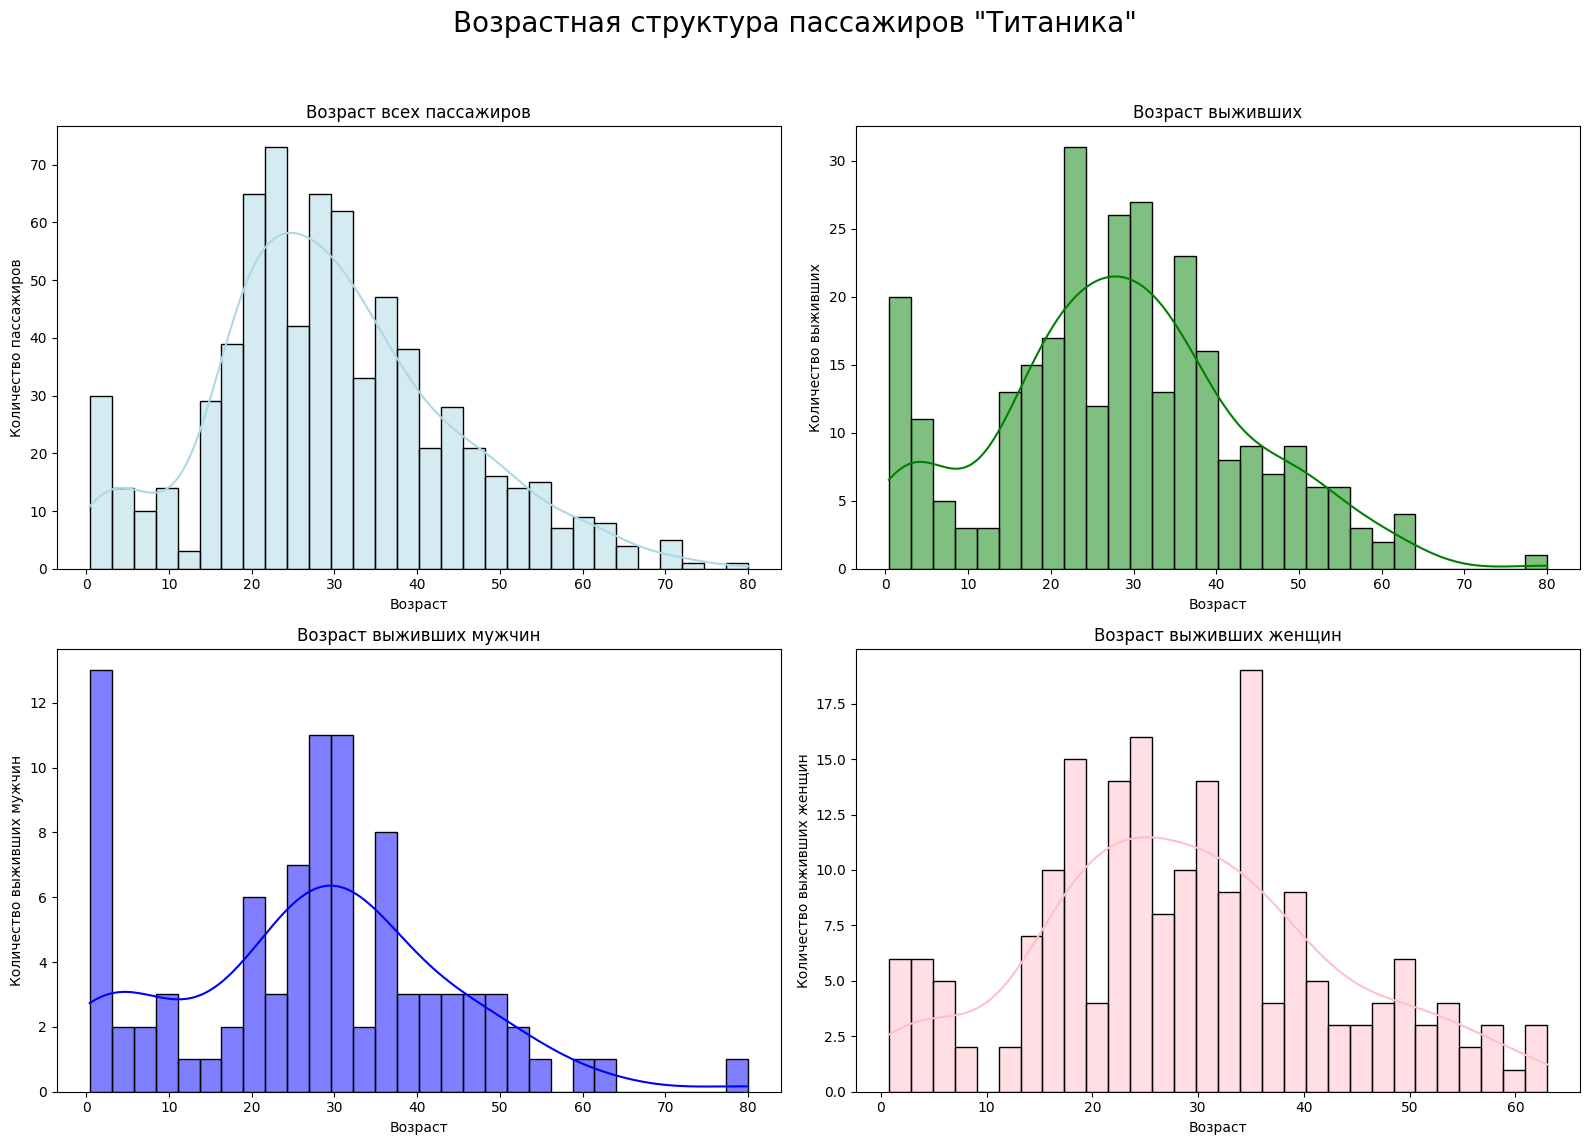

In [197]:
# 4. Кто (мужчины/женщины) выживал чаще в зависимости от возраста
# Вывод: по графикам видно, что больше людей было возрастом 20-35 лет. Люди 20-35 лет выживали чаще
# Вывод: также на графике Возраст выживших мужчин виден выброс от 0 до 2ех лет, что значит, что мальчики около нуля лет выживали чаще

plt.figure(figsize=(16, 12))

# 1. График возраста всех пассажиров
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='lightblue')
plt.title('Возраст всех пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

# 2. График возраста выживших
plt.subplot(2, 2, 2)
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green')
plt.title('Возраст выживших')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')

# 3. График возраста выживших мужчин
plt.subplot(2, 2, 3)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], bins=30, kde=True, color='blue')
plt.title('Возраст выживших мужчин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших мужчин')

# 4. График возраста выживших женщин
plt.subplot(2, 2, 4)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Age'], bins=30, kde=True, color='pink')
plt.title('Возраст выживших женщин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших женщин')

# Настройка общего заголовка и отображение графиков
plt.suptitle('Возрастная структура пассажиров "Титаника"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 Вывод: по графикам видно, что больше людей было возрастом 20-35 лет. Люди 20-35 лет выживали чаще

 Также на графике Возраст выживших мужчин виден выброс от 0 до 2ех лет, что значит, что мальчики около нуля лет выживали чаще

In [198]:
# Вывод: пассажиров до 18 лет спаслось 53.98%

children = df.loc[(df['Age'] < 18) & (df['Age'] > 0)]

# Фильтрация данных для выживших детей
survivors_children = children[children['Survived'] == 1]

# Вычисление процента выживших детей
percentage_survivors = round(len(survivors_children) * 100 / len(children), 2)

print(f'Пассажиров до 18 лет спаслось {percentage_survivors}%')

Пассажиров до 18 лет спаслось 53.98%


In [199]:
# Вывод: пассажиров от 18 лет и старше спаслось 38.1%

adults = df.loc[df['Age'] >= 18]

# Фильтрация данных для выживших взрослых
survivors_adults = adults[adults['Survived'] == 1]

# Вычисление процента выживших взрослых
percentage_survivors_adults = round(len(survivors_adults) * 100 / len(adults), 2)

print(f'Пассажиров 18 лет и старше спаслось {percentage_survivors_adults}%')

Пассажиров 18 лет и старше спаслось 38.1%


Вывод: дети выживали чаще, чем взрослые (54 процента против 38 соответственно)

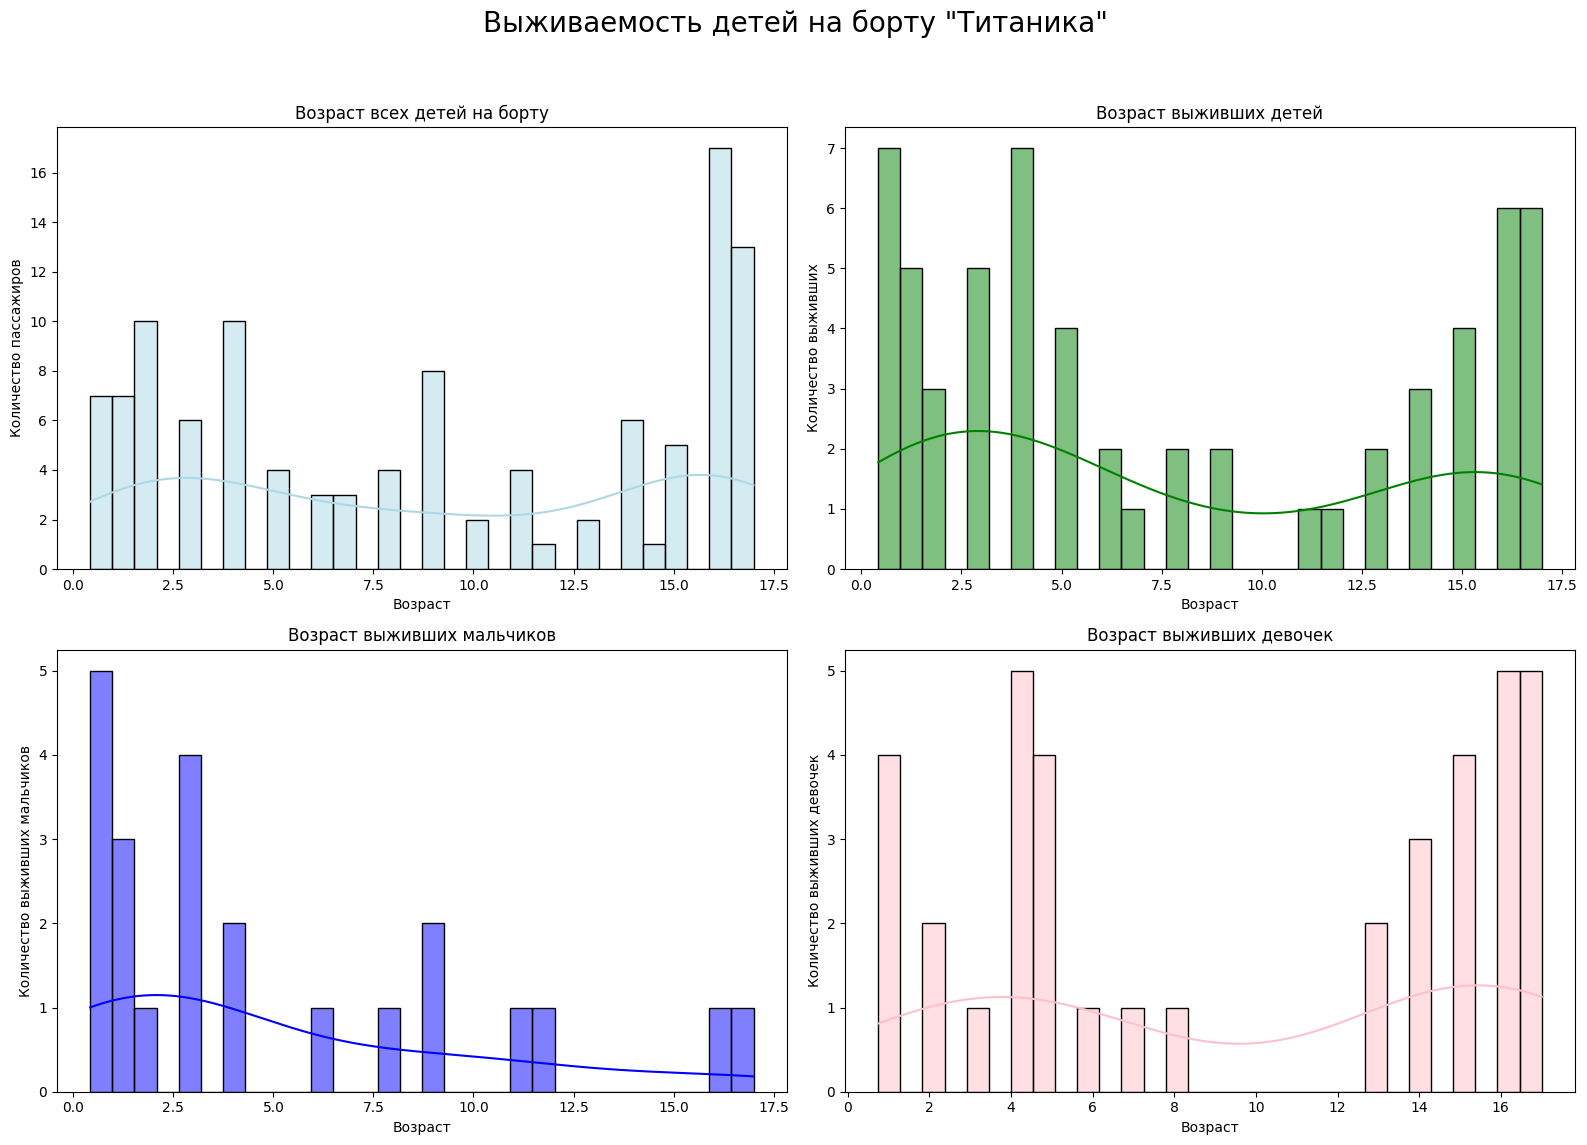

In [200]:
# Вывод: Вывод: в графиках детей (от 0 до 18 лет) мы можем наблюдать просадку по
# выживаемости в районе от 8 до 12 лет.
# У мальчиков эта просадка увеличивается вплоть до 18 лет,
# в то же время выживаемость у девочек этого возраста увеличивается.

# Фильтрация данных для детей (до 18 лет)
children = df.loc[(df['Age'] < 18) & (df['Age'] > 0)]

# Настройка размера фигуры
plt.figure(figsize=(16, 12))

# 1. График возраста всех детей
plt.subplot(2, 2, 1)
sns.histplot(children['Age'], bins=30, kde=True, color='lightblue')
plt.title('Возраст всех детей на борту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

# 2. График возраста выживших детей
survivors_children = children[children['Survived'] == 1]
plt.subplot(2, 2, 2)
sns.histplot(survivors_children['Age'], bins=30, kde=True, color='green')
plt.title('Возраст выживших детей')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')

# 3. График возраста выживших мальчиков
survivors_boys = survivors_children[survivors_children['Sex'] == 'male']
plt.subplot(2, 2, 3)
sns.histplot(survivors_boys['Age'], bins=30, kde=True, color='blue')
plt.title('Возраст выживших мальчиков')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших мальчиков')

# 4. График возраста выживших девочек
survivors_girls = survivors_children[survivors_children['Sex'] == 'female']
plt.subplot(2, 2, 4)
sns.histplot(survivors_girls['Age'], bins=30, kde=True, color='pink')
plt.title('Возраст выживших девочек')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших девочек')

plt.suptitle('Выживаемость детей на борту "Титаника"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Вывод: в графиках детей (от 0 до 18 лет) мы можем наблюдать просадку по выживаемости в районе от 8 до 12 лет. у мальчиков эта просадка увеличивается вплоть до 18 лет, в то же время выживаемость у девочек этого возраста увеличивается.

In [201]:
# Функция разделения людей по возрасту на возрастные группы (в процентном соотношении выжил/не выжил)
def age_gender_category(row):
    age = row['Age']
    sex = row['Sex']
    if age < 18:
        return f'Дети ({sex.capitalize()})'
    elif 18 <= age < 60:
        return f'Взрослые ({sex.capitalize()})'
    else:
        return f'Пожилые ({sex.capitalize()})'

df['AgeGenderGroup'] = df.apply(age_gender_category, axis=1)

age_gender_survival = df.groupby('AgeGenderGroup')['Survived'].value_counts(normalize=True).unstack() * 100
print(age_gender_survival)

Survived                   0          1
AgeGenderGroup                         
Взрослые (Female)  23.267327  76.732673
Взрослые (Male)    82.037534  17.962466
Дети (Female)      30.909091  69.090909
Дети (Male)        60.344828  39.655172
Пожилые (Female)   29.824561  70.175439
Пожилые (Male)     86.986301  13.013699


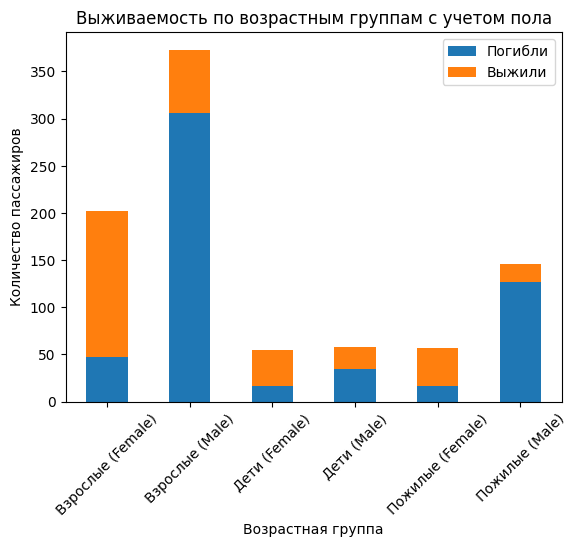

In [202]:
# График по разделению людей по возрасту на возрастные группы (в процентном соотношении выжил/не выжил)
age_gender_survival = df.groupby(['AgeGenderGroup', 'Survived']).size().unstack().fillna(0)

age_gender_survival.plot(kind='bar', stacked=True)
plt.title('Выживаемость по возрастным группам с учетом пола')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.legend(['Погибли', 'Выжили'])
plt.show()

## 5. Кол-во выживших/не выживших пассажиров в зависимости от стоимости билета

In [203]:
# Вывод: из графика видно, что те, кто покупал билет дороже - выживали чаще

# бин для стоимости билета
bins = range(0, 501, 70)
labels = range(0, 490, 70)

df['FareRange'] = pd.cut(df['Fare'], bins = bins, labels = labels, right = False)

# Группировка данных по новому параметру FareRange и статусу выживания
fare_count = df. groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)

<ipython-input-203-4be9048dcc1f>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_count = df. groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)


Вывод: из графика видно, что те, кто покупал билет дороже - выживали чаще.

In [204]:
df = df.drop('FareRange', axis = 1)

## 6. Кол-во выживших пассажиров по порту отправления

In [205]:
# Подсчет количества пассажиров по каждому порту отправления
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


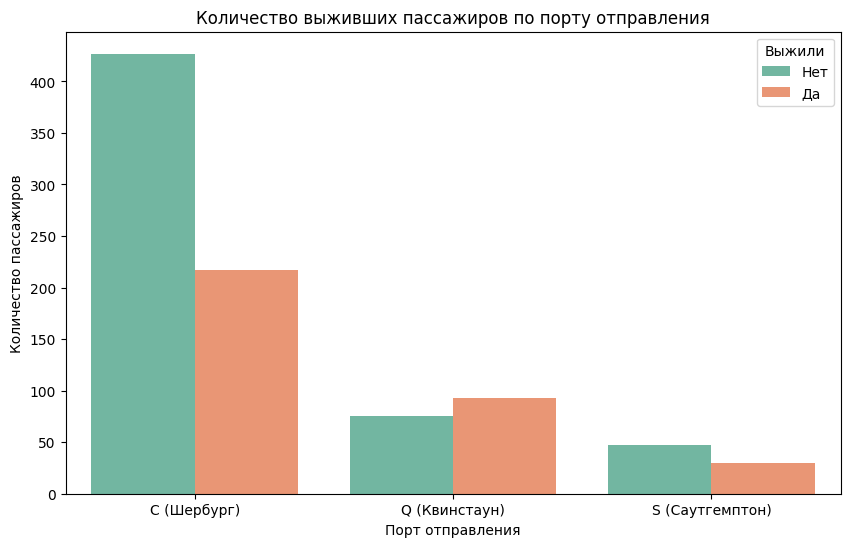

In [206]:
# Построение графика количества выживших по порту отправления
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set2')

plt.title('Количество выживших пассажиров по порту отправления')
plt.xlabel('Порт отправления')
plt.ylabel('Количество пассажиров')
plt.xticks(ticks=[0, 1, 2], labels=['C (Шербург)', 'Q (Квинстаун)', 'S (Саутгемптон)'])

plt.legend(title='Выжили', labels=['Нет', 'Да'])
plt.show()

## 7. Влияние Колонки Cabin с идентификатороми кабин

Из колонки можно извлечь сектор (= буква: A, B, C, D, F, G) и место (номер) для Feature Engineering

In [207]:
df["Cabin"].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [208]:
# Обработка пропусков: заменяем NaN на пустую строку
df['Cabin'] = df['Cabin'].fillna('')

# Преобразование значений в строку
df['Cabin'] = df['Cabin'].astype(str)

# Создание нового столбца для сектора (палубы)
df['Deck'] = df['Cabin'].str[0]

# Создание нового столбца для номера каюты
df['Room'] = df['Cabin'].str.extract(r'(\d+)')
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')

# Проверка
print(df[['Cabin', 'Deck', 'Room']].head())

            Cabin Deck   Room
PassengerId                  
1                  NaN    NaN
2             C85    C   85.0
3                  NaN    NaN
4            C123    C  123.0
5                  NaN    NaN


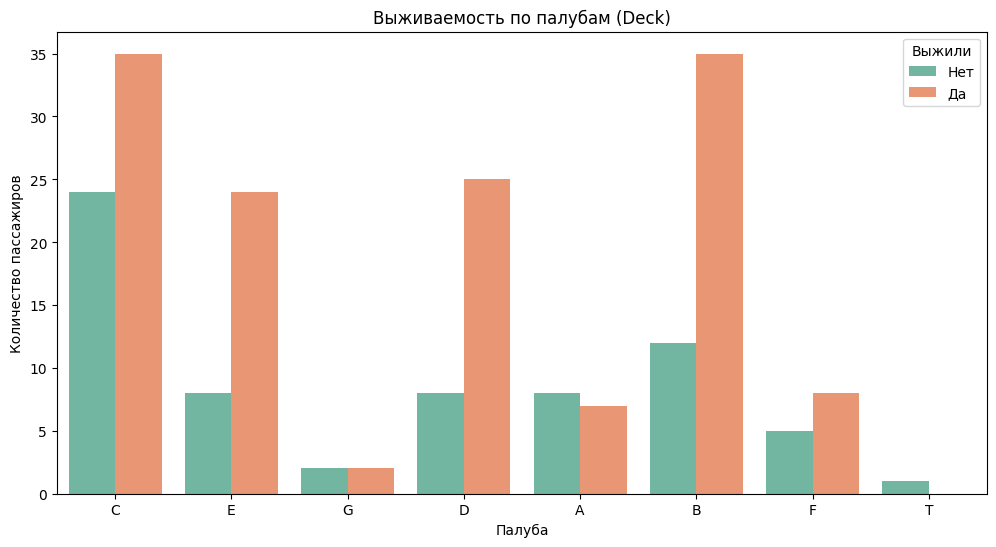

In [209]:
# Вывод: в процентном соотношении вероятность выживания пассажиров из портов 1, 2, 3. 4 было выше.
# В количественном соотношении - из порта 8, так как в этом порту было больше людей.

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Deck', hue='Survived', palette='Set2')
plt.title('Выживаемость по палубам (Deck)')
plt.xlabel('Палуба')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выжили', labels=['Нет', 'Да'])
plt.show()

Вывод: в процентном соотношении вероятность выживания пассажиров из портов 1, 2, 3. 4 было выше.

В количественном соотношении - из порта 8, так как в этом порту было больше людей.

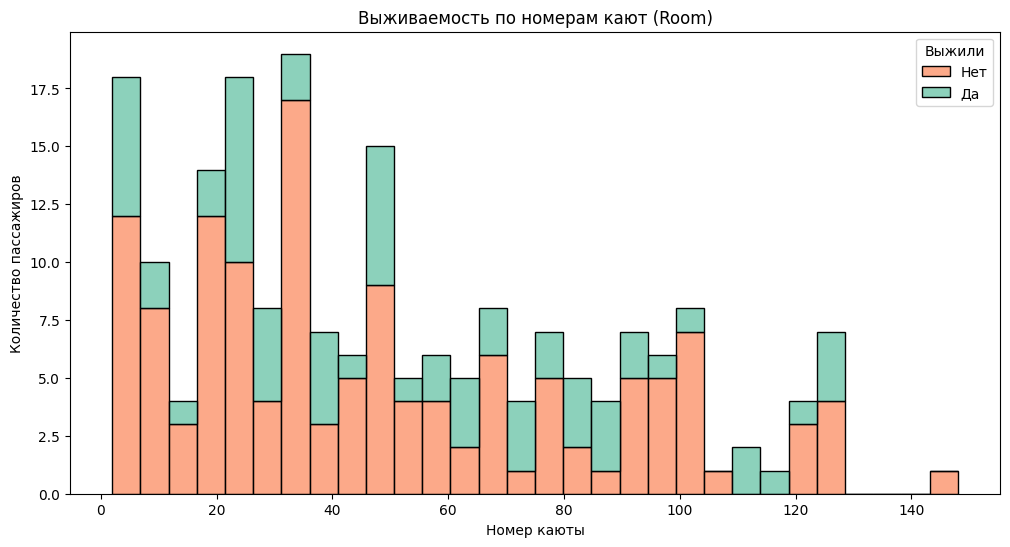

In [210]:
# Вывод: вероятность выживания пассажиров из кабин 1 - 50 было выше

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Room', hue='Survived', multiple='stack', bins=30, palette='Set2')
plt.title('Выживаемость по номерам кают (Room)')
plt.xlabel('Номер каюты')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выжили', labels=['Нет', 'Да'])
plt.show()

Вывод: вероятность выживания пассажиров из кабин 1 - 50 было выше.

In [211]:
# df.drop(['Cabin'], axis=1, inplace=True, errors='ignore')
df.drop(['Deck'], axis=1, inplace=True, errors='ignore')
df.drop(['Room'], axis=1, inplace=True, errors='ignore')


# 3. Выводы по аналитике

## Общие выводы

1. Соотношение мужчин и женщин:

Мужчин было больше, чем женщин. Это может указывать на социальные нормы того времени, когда мужчины часто брали на себя роль защитников.

2. Распределение по возрастам:

Большинство пассажиров находились в возрасте от 20 до 37 лет. Также наблюдается значительное количество детей (от 0 до 3 лет), что может указывать на наличие семейных групп.

3. Пропуски в данных:

В столбцах Age, Cabin и Embarked есть пропуски (177, 687 и 2 соответственно). Это необходимо учитывать при анализе и построении модели.

<br>

<br>

## Анализ выживаемости

1. Распределение возраста по выжившим и погибшим:

Распределение показывает, что молодые люди (в основном в возрасте 20-35 лет) выживали чаще. Выбросы среди детей указывают на то, что маленькие мальчики выживали лучше.

2. Подсчет количества выживших и погибших:

62% пассажиров погибли, а 38% выжили. Это подчеркивает высокую смертность во время катастрофы.

3. Выживаемость по полу:

Женщины выживали чаще, чем мужчины (81% мужчин погибли по сравнению с 74% женщин). Это может быть связано с тем, что женщины и дети имели приоритет при посадке на спасательные шлюпки.

4. Выживаемость по возрастным группам:

Дети (до 18 лет) выживали чаще (54%) по сравнению со взрослыми (38%). Это также подтверждает информацию о том, что мальчики младшего возраста имели более высокие шансы на выживание.

5. Влияние стоимости билета на выживаемость:

Пассажиры, купившие более дорогие билеты, выживали чаще. Это может указывать на то, что более обеспеченные пассажиры имели больше возможностей для спасения.

6. Выживаемость по порту отправления:

Географическое положение могло влиять на шансы на выживание, так пассажиры из порта Квинстаун выживали чаще, но в общем количестве из Шербурга выжило больше человек (потому что там изначатьно было больше людей)

2  -  646;

0  -  168;

1  -   77;


7. Выживаемость по кабине (каюте) и номеру каюты:

В процентном соотношении вероятность выживания пассажиров из портов 1, 2, 3. 4 было выше.
В количественном соотношении - из порта 8, так как в этом порту было больше людей.

Вероятность выживания пассажиров из кабин 1 - 50 было выше.




# 4. Feature Engineering

На основе выводов из пункта 1 можно придумать несколько признаков в модель. Показать влияние каждого признака на результат.


## Заполнение пропусков: Колонка Embarked

In [212]:
# Заполним пропуски Embarked модой - наиболее частым значением
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Проверка: пропусков - 0
print(df['Embarked'].isnull().sum())

0


<ipython-input-212-256983ea5f5c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


## Новый параметр Title из колонки Name с именами пассажиров

В колонке содержатся имена пассажиров с обращениями (такие как Mr, Mrs и тп)
Поэтому можно выделить эти обращения в отдельный признак Title для Feature Engineering

In [213]:
# Вывод: все имена - уникальны
df["Name"].nunique()

891

In [214]:
import re

# Функция для извлечения титула из имени
def extract_title(name):
    title_search = re.search(r',\s*([^\.]+)\.', name)
    if title_search:
        return title_search.group(1).strip()
    return None

df['Title'] = df['Name'].apply(extract_title)

print(df[['Name', 'Title']].head())

                                                          Name Title
PassengerId                                                         
1                                      Braund, Mr. Owen Harris    Mr
2            Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
3                                       Heikkinen, Miss. Laina  Miss
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
5                                     Allen, Mr. William Henry    Mr


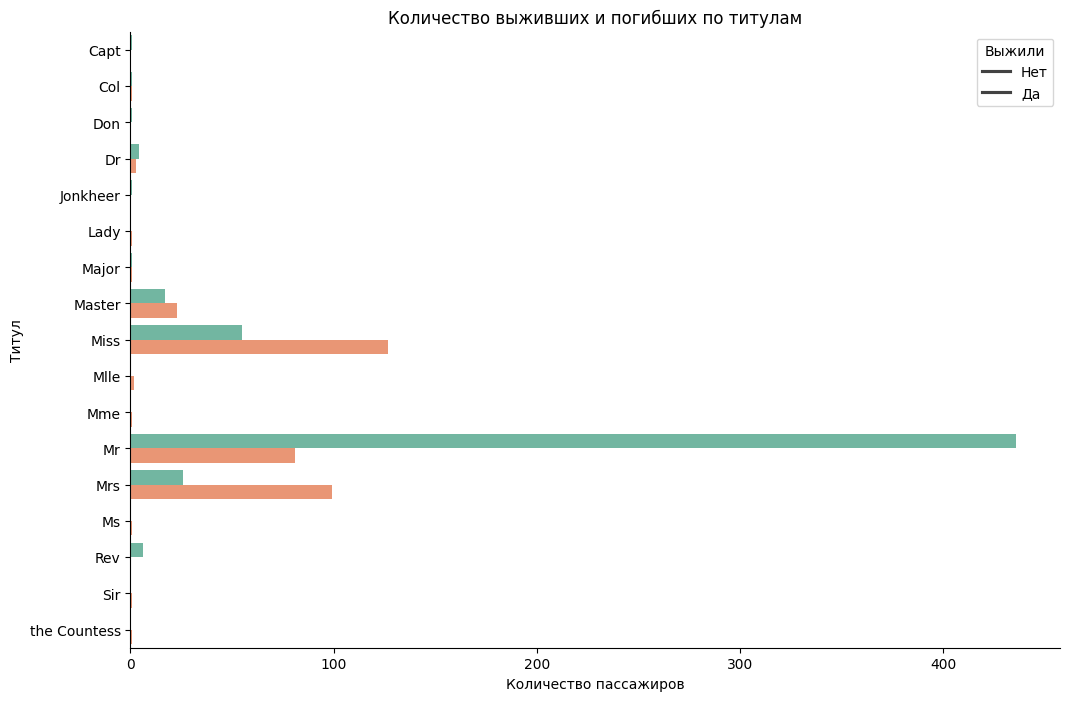

In [215]:
# Группировка данных по титулу и статусу выживания
title_survival_counts = df.groupby(['Title', 'Survived']).size().reset_index(name='Count')

# Настройка графика
plt.figure(figsize=(12, 8))

# Построение столбчатой диаграммы
sns.barplot(data=title_survival_counts, x='Count', y='Title', hue='Survived', palette='Set2')

# Настройка заголовка и меток
plt.title('Количество выживших и погибших по титулам')
plt.xlabel('Количество пассажиров')
plt.ylabel('Титул')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend(title='Выжили', labels=['Нет', 'Да'])
plt.show()

<ipython-input-216-ca93c1d6b118>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=title_summary, x='Survival Rate (%)', y='Title', palette='Set2')


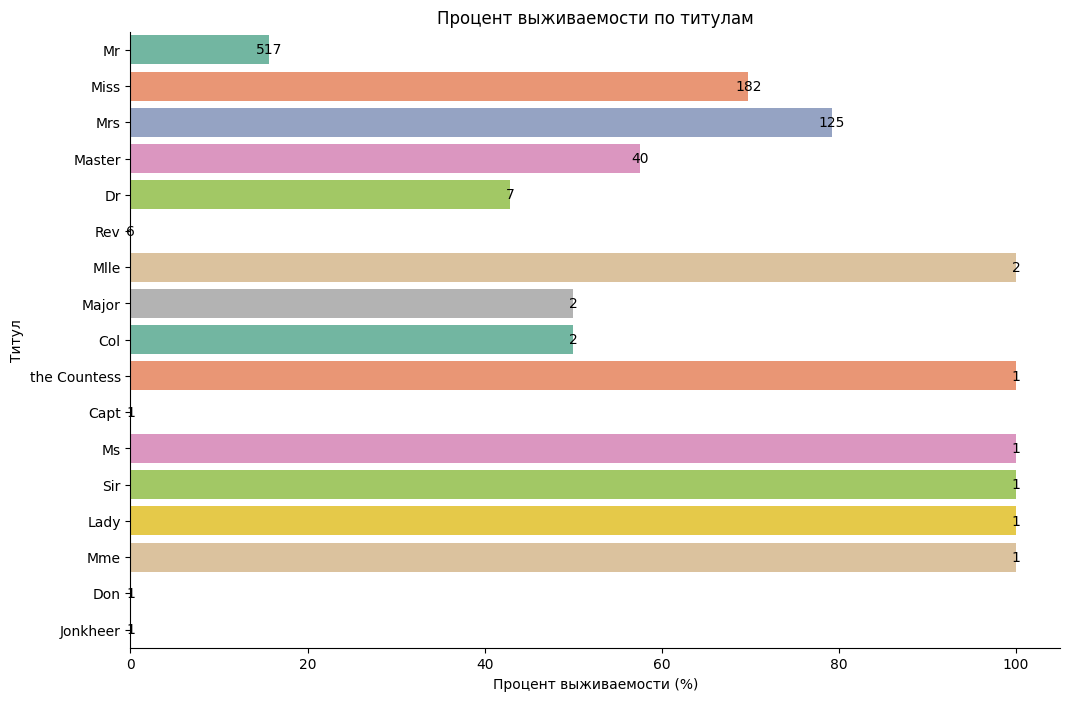

           Title  Count  Survival Rate (%)
0             Mr    517          15.667311
1           Miss    182          69.780220
2            Mrs    125          79.200000
3         Master     40          57.500000
4             Dr      7          42.857143
5            Rev      6           0.000000
6           Mlle      2         100.000000
7          Major      2          50.000000
8            Col      2          50.000000
9   the Countess      1         100.000000
10          Capt      1           0.000000
11            Ms      1         100.000000
12           Sir      1         100.000000
13          Lady      1         100.000000
14           Mme      1         100.000000
15           Don      1           0.000000
16      Jonkheer      1           0.000000


In [216]:
title_counts = df['Title'].value_counts().reset_index()
title_counts.columns = ['Title', 'Count']

# Группировка данных по титулу и статусу выживания
title_survival_counts = df.groupby(['Title', 'Survived']).size().unstack(fill_value=0)

# Расчет процента выживших
title_survival_counts['Survival Rate (%)'] = (title_survival_counts[1] / title_survival_counts.sum(axis=1)) * 100

# Объединение данных о количестве пассажиров с процентами выживаемости
title_summary = title_counts.merge(title_survival_counts[['Survival Rate (%)']], on='Title')

# Настройка графика
plt.figure(figsize=(12, 8))

# Построение столбчатой диаграммы
sns.barplot(data=title_summary, x='Survival Rate (%)', y='Title', palette='Set2')

# Добавление текста с количеством пассажиров на график внутри столбиков
for index, row in title_summary.iterrows():
    plt.text(row['Survival Rate (%)'], index, f"{row['Count']}", color='black', ha="center", va="center")

# Настройка заголовка и меток
plt.title('Процент выживаемости по титулам')
plt.xlabel('Процент выживаемости (%)')
plt.ylabel('Титул')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# Вывод количества пассажиров по титулам в текстовом формате
print(title_summary)

In [217]:
captains = df[df['Title'].str.contains('Capt', case=False, na=False)]

num_captains = len(captains)
print(f'Количество капитанов на "Титанике": {num_captains}')

print(captains[['Name', 'Age', 'Survived']])

Количество капитанов на "Титанике": 1
                                     Name   Age  Survived
PassengerId                                              
746          Crosby, Capt. Edward Gifford  70.0         0


In [218]:
titlul_Mlle = df[df['Title'].str.contains('Mlle', case=False, na=False)]

num_titlul_Mlle = len(titlul_Mlle)
print(f'Количество Mlle на "Титанике": {num_titlul_Mlle}')

print(titlul_Mlle[['Name', 'Age', 'Survived']])

Количество Mlle на "Титанике": 2
                                                         Name   Age  Survived
PassengerId                                                                  
642                                      Sagesser, Mlle. Emma  24.0         1
711          Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  24.0         1


In [219]:
titlul_sir = df[df['Title'].str.contains('Sir', case=False, na=False)]

num_titlul_sir = len(titlul_sir)
print(f'Количество Sir на "Титанике": {num_titlul_Mlle}')

print(titlul_sir[['Name', 'Age', 'Survived']])

Количество Sir на "Титанике": 2
                                                     Name   Age  Survived
PassengerId                                                              
600          Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")  49.0         1


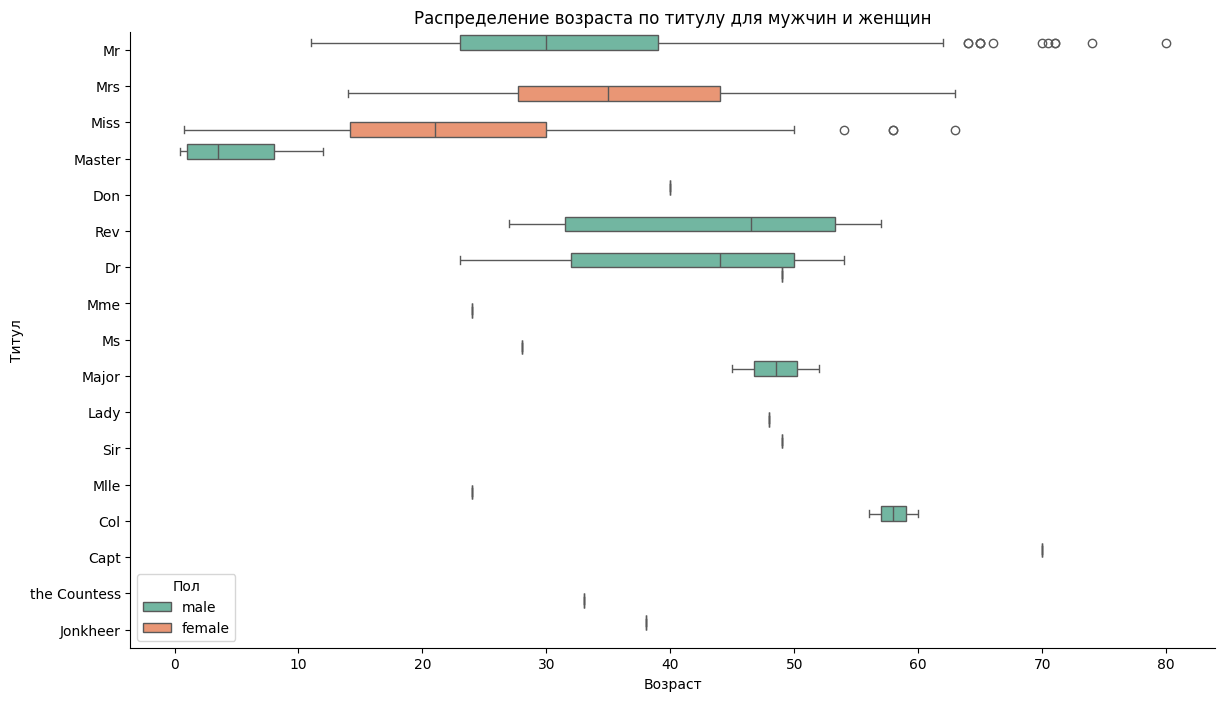

In [220]:
plt.figure(figsize=(14, 8))

# Построение графика распределения возраста по титулу с разделением на пол
sns.boxplot(data=df, x='Age', y='Title', hue='Sex', palette='Set2')

plt.title('Распределение возраста по титулу для мужчин и женщин')
plt.xlabel('Возраст')
plt.ylabel('Титул')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend(title='Пол')
plt.show()

Примечание: люди с женскими титулами(кроме Miss и Mrs), а также мужской титул Sir (один человек) выживали со 100 процентой вероятностью, потому что таких людей было мало на борту.

Поэтому, если людей с определенным титулом было мало, то такой параметр становится бесполезным. Уберем такие значения.

In [221]:
title_counts = df['Title'].value_counts().to_dict()
df['Title'] = df['Title'].apply(lambda x: x if title_counts[x] > 2 else "None")

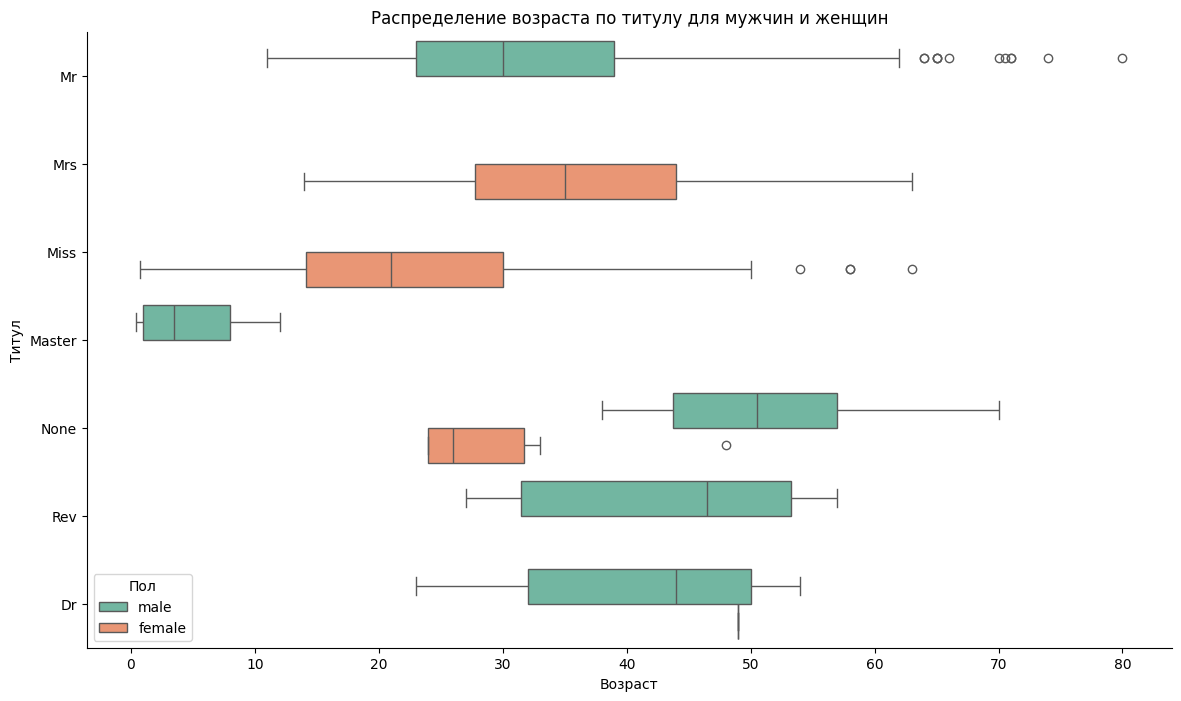

In [222]:
plt.figure(figsize=(14, 8))

# Построение графика распределения возраста по титулу с разделением на пол
sns.boxplot(data=df, x='Age', y='Title', hue='Sex', palette='Set2')

plt.title('Распределение возраста по титулу для мужчин и женщин')
plt.xlabel('Возраст')
plt.ylabel('Титул')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend(title='Пол')
plt.show()

## Заполнение пропусков: Колонка Age исходя из Титула

Из графика видно, что есть зависимость между Титулом и Возрастом человека.
Исходя из этого мы можем заполнить пропуски в Age (177 пропуска)
Заполняем пропуски по среднему значению возраста в группах Титул

In [223]:
print(df[['Age']].isnull().sum())  # Проверка на наличие пустых значений

Age    177
dtype: int64


In [224]:
# 1. Группировка данных по титулу и вычисление среднего возраста
title_age_mean = df.groupby('Title')['Age'].mean().reset_index()

# 2. Заполнение пропусков в возрасте на основе среднего возраста по титулу
def fill_age_with_title_mean(row):
    if pd.isnull(row['Age']):
        # Найти средний возраст по титулу
        return title_age_mean.loc[title_age_mean['Title'] == row['Title'], 'Age'].values[0]
    return row['Age']

# Применение функции к DataFrame
df['Age'] = df.apply(fill_age_with_title_mean, axis=1)

print(df[['Age']].isnull().sum())  # Проверка на наличие пустых значений

Age    0
dtype: int64


Посмотрим как изменился график Выживаемости по возрасту

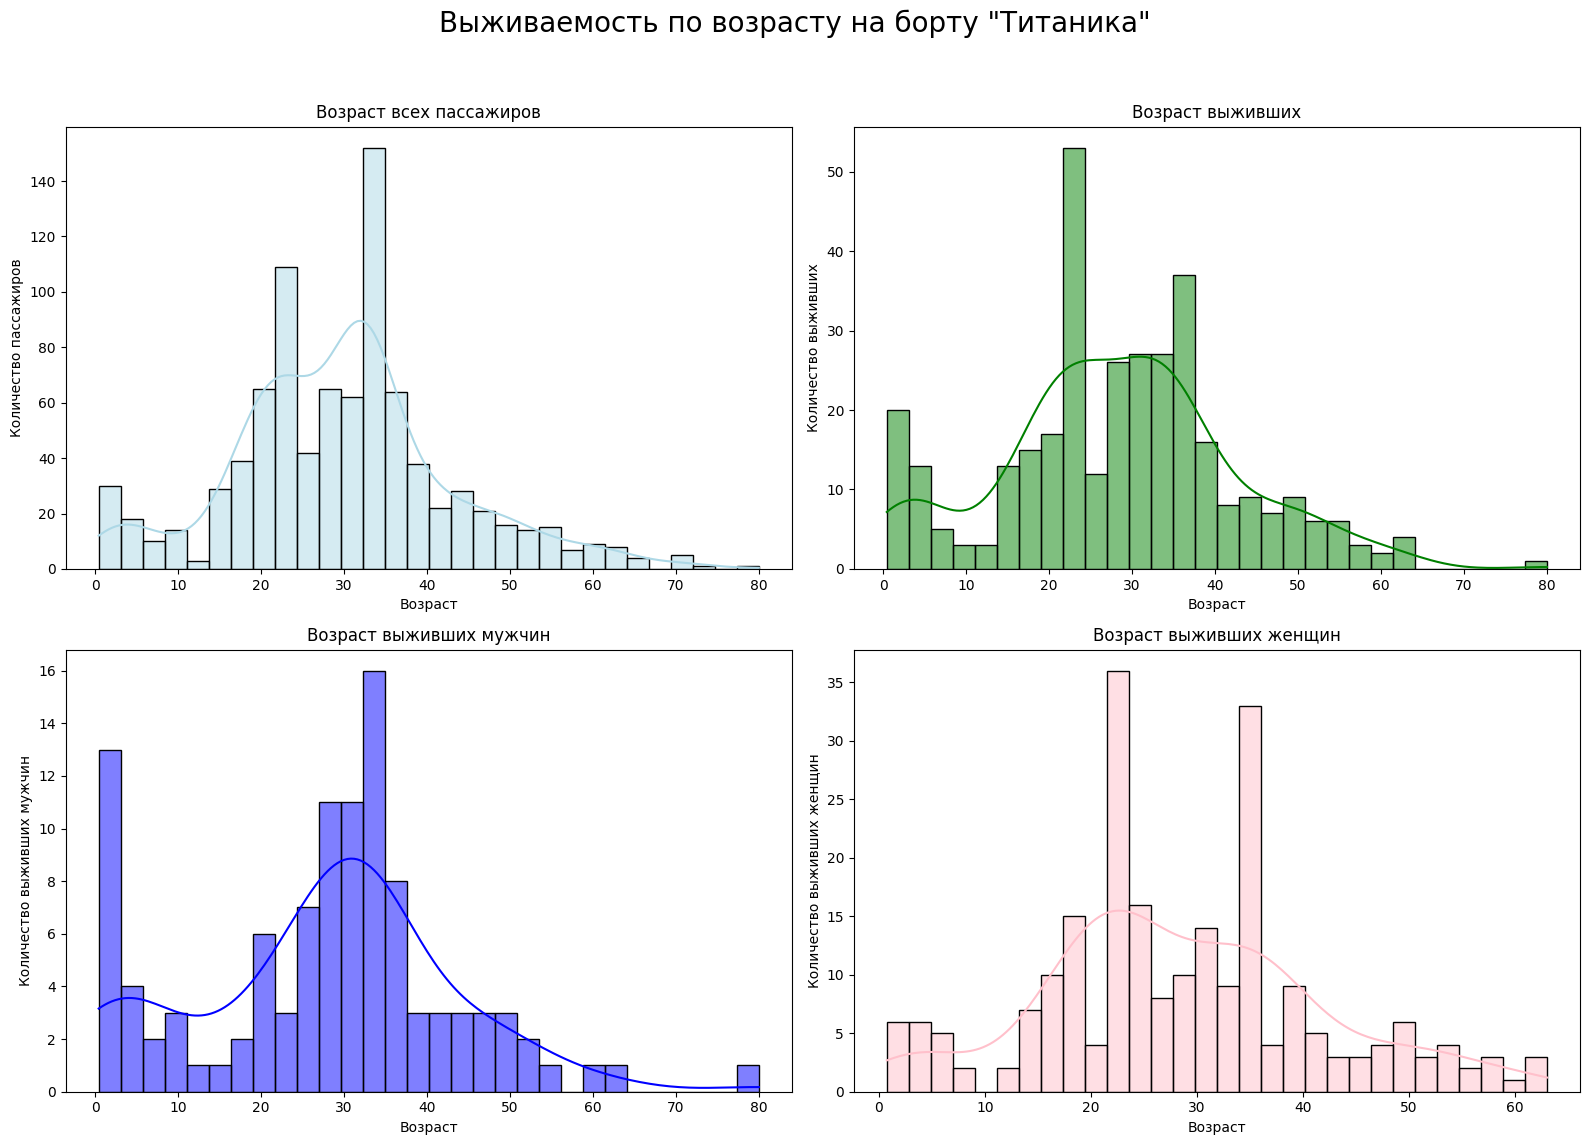

In [225]:
plt.figure(figsize=(16, 12))

# 1. График возраста всех пассажиров
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='lightblue')
plt.title('Возраст всех пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

# 2. График возраста выживших
plt.subplot(2, 2, 2)
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green')
plt.title('Возраст выживших')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')

# 3. График возраста выживших мужчин
plt.subplot(2, 2, 3)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], bins=30, kde=True, color='blue')
plt.title('Возраст выживших мужчин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших мужчин')

# 4. График возраста выживших женщин
plt.subplot(2, 2, 4)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Age'], bins=30, kde=True, color='pink')
plt.title('Возраст выживших женщин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших женщин')

# Настройка общего заголовка и отображение графиков
plt.suptitle('Выживаемость по возрасту на борту "Титаника"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

для сравнения график до заполнения пропусков в возрасте:
Картинка:

Вывод: после заполнения пропусков в колонке Age увеличилось число возрастов от 18 до 40 лет

In [226]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


## Новый параметр FamilySize из колонок SibSp + Parch

Из колонок SibSp + Parch = Размер семьи
для Feature Engineering

<Figure size 1200x600 with 0 Axes>

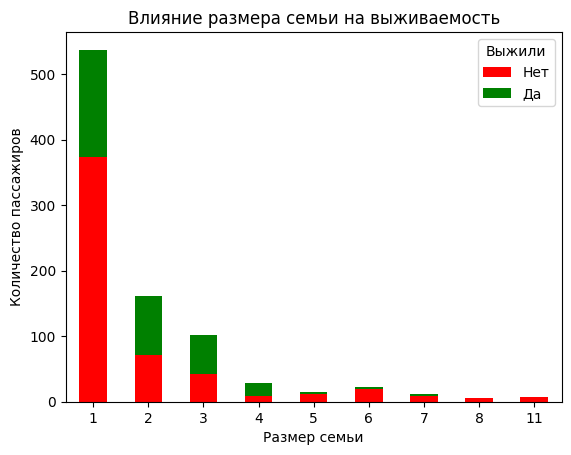

In [227]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # включаем и самого пассажира

family_survival = df.groupby(['FamilySize', 'Survived']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
family_survival.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('Влияние размера семьи на выживаемость')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)

plt.legend(title='Выжили', labels=['Нет', 'Да'])
plt.show()

In [228]:
# Вывод: самая высокая выживаемость у семьи из 4ех человек
# Расчет процентного соотношения
family_survival_percentage = family_survival.div(family_survival.sum(axis=1), axis=0) * 100

print(family_survival_percentage)

Survived             0          1
FamilySize                       
1            69.646182  30.353818
2            44.720497  55.279503
3            42.156863  57.843137
4            27.586207  72.413793
5            80.000000  20.000000
6            86.363636  13.636364
7            66.666667  33.333333
8           100.000000   0.000000
11          100.000000   0.000000


# 5. Построение модели

In [229]:
from sklearn.preprocessing import LabelEncoder

categories_columns = df.select_dtypes(include=['object']).columns
label_encoder = {}

for column in categories_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [230]:
label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGenderGroup,Title,FamilySize
PassengerId,,,,,,,,,,,,,,
1,0,3,108,1,30,1,0,523,7.2500,0,2,1,3,2
2,1,1,190,0,55,1,0,596,71.2833,82,0,0,4,2
3,1,3,353,0,36,0,0,669,7.9250,0,2,0,2,1
4,1,1,272,0,50,1,0,49,53.1000,56,2,0,4,2
5,0,3,15,1,50,0,0,472,8.0500,0,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,548,1,37,0,0,101,13.0000,0,2,1,6,1
888,1,1,303,0,25,0,0,14,30.0000,31,2,0,2,1
889,0,3,413,0,29,1,2,675,23.4500,0,2,4,2,4


In [231]:
X = df.drop(columns=['Survived'])
y = df['Survived']

## Первая модель. Финальная

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5390 - loss: 0.6863 - val_accuracy: 0.7622 - val_loss: 0.6335
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7484 - loss: 0.6193 - val_accuracy: 0.7762 - val_loss: 0.5734
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7449 - loss: 0.5653 - val_accuracy: 0.8042 - val_loss: 0.5151
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7627 - loss: 0.5151 - val_accuracy: 0.8042 - val_loss: 0.4710
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7889 - loss: 0.4714 - val_accuracy: 0.8042 - val_loss: 0.4544
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8033 - loss: 0.4556 - val_accuracy: 0.8392 - val_loss: 0.4387
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.4438 - val_accuracy: 0.8462 - val_loss: 0.4214
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8150 - loss: 0.4274 - val_accuracy: 0.8462 - val_loss: 0.4124
Ep

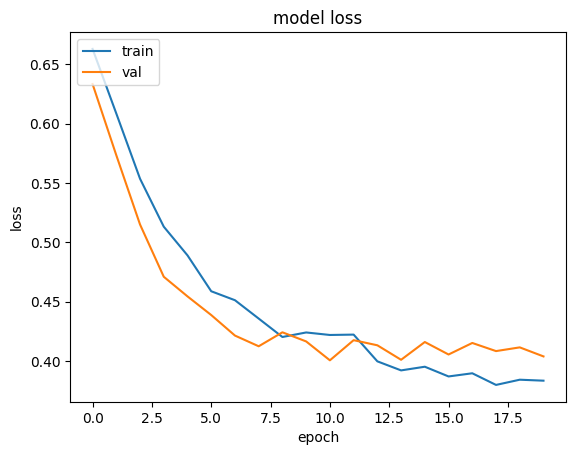

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель нейронной сети
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Вторая модель

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5743 - loss: 0.6824 - val_accuracy: 0.6503 - val_loss: 0.6576
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5709 - loss: 0.6821 - val_accuracy: 0.7063 - val_loss: 0.6249
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6556 - loss: 0.6560 - val_accuracy: 0.7273 - val_loss: 0.6007
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6631 - loss: 0.6424 - val_accuracy: 0.7483 - val_loss: 0.5724
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6715 - loss: 0.6423 - val_accuracy: 0.7902 - val_loss: 0.5478
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6553 - loss: 0.6263 - val_accuracy: 0.8042 - val_loss: 0.5290
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7045 - loss: 0.5847 - val_accuracy: 0.8042 - val_loss: 0.5077
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5836 - val_accuracy: 0.7972 - val_loss: 0.4847
Ep

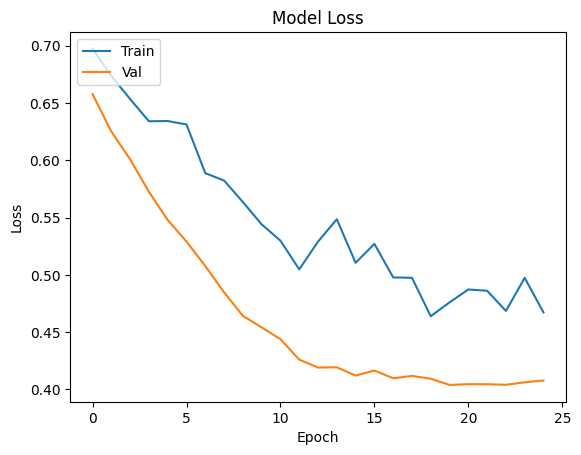

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель нейронной сети
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Добавление EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели с использованием EarlyStopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Визуализация потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Третья модель

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4802 - loss: 0.6910 - val_accuracy: 0.7483 - val_loss: 0.6488
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.6351 - val_accuracy: 0.7972 - val_loss: 0.5921
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.5768 - val_accuracy: 0.7832 - val_loss: 0.5293
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7643 - loss: 0.5240 - val_accuracy: 0.7972 - val_loss: 0.4686
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7814 - loss: 0.4634 - val_accuracy: 0.8042 - val_loss: 0.4391
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8070 - loss: 0.4295 - val_accuracy: 0.8392 - val_loss: 0.4078
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8225 - loss: 0.4274 - val_accuracy: 0.8392 - val_loss: 0.4086
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.4076 - val_accuracy: 0.8392 - val_loss: 0.4158
Ep

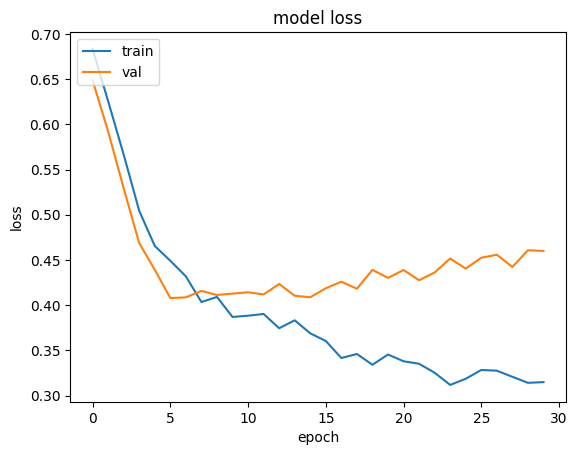

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Четвертая модель

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5931 - loss: 0.7026 - val_accuracy: 0.6993 - val_loss: 0.6531
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5836 - loss: 0.6722 - val_accuracy: 0.7622 - val_loss: 0.6277
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6482 - loss: 0.6441 - val_accuracy: 0.7552 - val_loss: 0.5969
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6717 - loss: 0.6357 - val_accuracy: 0.7832 - val_loss: 0.5672
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6767 - loss: 0.6041 - val_accuracy: 0.7902 - val_loss: 0.5374
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7168 - loss: 0.5990 - val_accuracy: 0.7902 - val_loss: 0.5073
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.5559 - val_accuracy: 0.7902 - val_loss: 0.4861
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7235 - loss: 0.5544 - val_accuracy: 0.8252 - val_loss: 0.4712
Ep

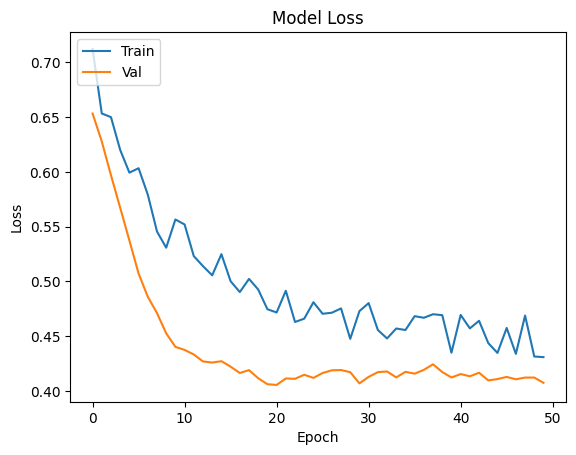

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель нейронной сети
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Визуализация потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Различия моделей

1. Первая модель

Количество нейронов: 32 в первом слое.

Эпохи: 20.

Dropout: Не используется.

<br>

2. Вторая модель

Количество нейронов: 64 в первом слое.

Эпохи: 50.

Dropout: Используется (0.5).

EarlyStopping: Включен для предотвращения переобучения.

<br>

3. Третья модель

Количество нейронов: 64 в первом слое.

Эпохи: 30.

Dropout: Не используется.

<br>

4. Четвертая модель

Количество нейронов: 64 в первом слое.

Эпохи: 50.

Dropout: Используется (0.5).

EarlyStopping: Не включен.


# 6. Кросс-валидация

# 7. Вывод. Расшифровка матрицы ошибок